**Group ID: Group 15**

Tyler Brannon - TylerBran

Patrick Guerin - guerinp19

Eric D’Souza - ericdagoat

Mohammadreza Rahbar - MRR02

In [22]:
#setup
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt
import seaborn as sns

def open_csv(file_name):
    collection = []
    with open(file_name, 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
    
students_math = open_csv('student-mat.csv')
students_por = open_csv('student-por.csv')

**Data Cleaning**

1.) combine both tables to make the data easier to work with

2.) parse any numbers represented as strings to ints (i.e., goout is represented as a string so we should parse it to a int)

3.) get rid of any unreadable data points (i.e., any NA values)

4.) drop any students that appear in both data sets (there is a note at the bottom of the dataset link to the dataset that explain how to determine how a student is in both datasets)

In [91]:
# combining tables and removing duplicate students
df_port = pd.DataFrame(students_por)
df_math = pd.DataFrame(students_math)
df_combine =  pd.concat([df_port,df_math])
df_combine = df_combine.reset_index()
considered = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]
#df_combine = df_combine.drop(labels = 'index', axis=1)
df_combine = df_combine.drop_duplicates(subset=considered,ignore_index = True)
df_combine

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,4,0,11,11
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,2,9,11,11
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,6,12,13,12
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,0,14,14,14
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,370,MS,F,19,U,LE3,T,3,2,services,...,3,2,2,1,1,3,4,7,7,9
658,376,MS,F,20,U,GT3,T,4,2,health,...,5,4,3,1,1,3,4,15,14,15
659,390,MS,M,20,U,LE3,A,2,2,services,...,5,5,4,4,5,4,11,9,9,9
660,392,MS,M,21,R,GT3,T,1,1,other,...,5,5,3,3,3,3,3,10,8,7


In [56]:
#parsing to ints
df_combine['age'] = df_combine['age'].apply(pd.to_numeric)
df_combine['Medu'] = df_combine['Medu'].apply(pd.to_numeric)
df_combine['Fedu'] = df_combine['Fedu'].apply(pd.to_numeric)
df_combine['traveltime'] = df_combine['traveltime'].apply(pd.to_numeric)
df_combine['studytime'] = df_combine['studytime'].apply(pd.to_numeric)
df_combine['famrel'] = df_combine['famrel'].apply(pd.to_numeric)
#df_combine['freetime'] = df_combine['freetime'].apply(pd.to_numeric)
#df_combine['goout'] = df_combine['goout'].apply(pd.to_numeric)
df_combine['Dalc'] = df_combine['Dalc'].apply(pd.to_numeric)
df_combine['Walc'] = df_combine['Walc'].apply(pd.to_numeric)
df_combine['health'] = df_combine['health'].apply(pd.to_numeric)
df_combine['absences'] = df_combine['absences'].apply(pd.to_numeric)
df_combine['G1'] = df_combine['G1'].apply(pd.to_numeric)
df_combine['G2'] = df_combine['G2'].apply(pd.to_numeric)
df_combine['G3'] = df_combine['G3'].apply(pd.to_numeric)

In [57]:
#removing unreadable data
df_combine= df_combine.dropna(how="any")

**Exploring The Data**<br>
1.) What are the different columns and how many are there

2.) how do the students surveyed range in age

3.) how many math students were surveyed compared to portuguse students

4.) is there even distribution of male vs female students surveyed

5.) what are the different job categories in the table

6.) how many attend each students attend each school out of the students surveyed

In [58]:
#shows all keys and total number of keys
print(df_combine.keys())
print('total columns: %d'%len(df_combine.keys()))

Index(['index', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
total columns: 34


from this we can see that there are 33 different statistic tracked

In [59]:
#shows number of students surveyed for each table
print("Math Students Surveyed: %d"%len(df_math))
print("Portuguese Students Surveyed: %d"%len(df_port))

Math Students Surveyed: 395
Portuguese Students Surveyed: 649


From this we can see that more portugese language students surveyed compared to math students

F    390
M    272
Name: sex, dtype: int64

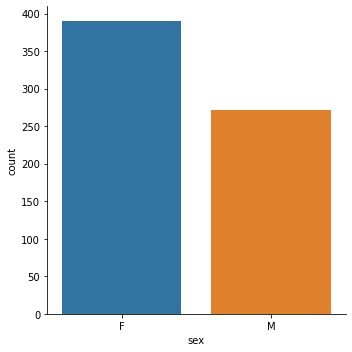

In [60]:
sns.catplot(data=df_combine,kind='count', x="sex")
df_combine['sex'].value_counts()

from this we can see that slightly more female students were surveyed than male students

In [61]:
print("minimun age: %d"%df_combine['age'].min())
print("maximun age: %d"%df_combine['age'].max())
print("range:       %d"%(df_combine['age'].max()-df_combine['age'].min()))

minimun age: 15
maximun age: 22
range:       7


from this we can see that the youngest students surveyed were 15 and the oldest were 22 this gives us a range of 7

In [62]:
np.unique(df_combine[['Fjob','Mjob']])

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

GP    434
MS    228
Name: school, dtype: int64

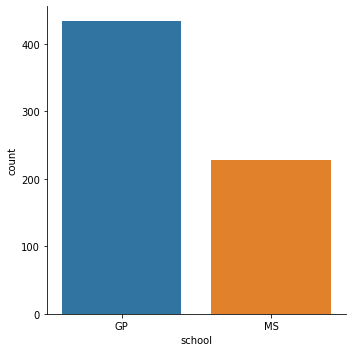

In [63]:
sns.catplot(data=df_combine,kind='count', x="school")
df_combine['school'].value_counts()

from the graph we can see that a moderate amount more students from GP then from MS that were surveyed

**Question 1**<br>Which ages drink the most? Look at age groups of students that drink and find a few age numbers where drinking is more commmon.

In [64]:
count_age = df_combine['age'].value_counts()
count_age

17    178
16    173
18    142
15    112
19     45
20      8
21      3
22      1
Name: age, dtype: int64

In [65]:
# group by ages of average alcohol consumption for weekdays and weekends
grouped_Dalc = df_combine.groupby('age')['Dalc'].mean().reset_index()
grouped_Walc = df_combine.groupby('age')['Walc'].mean().reset_index()

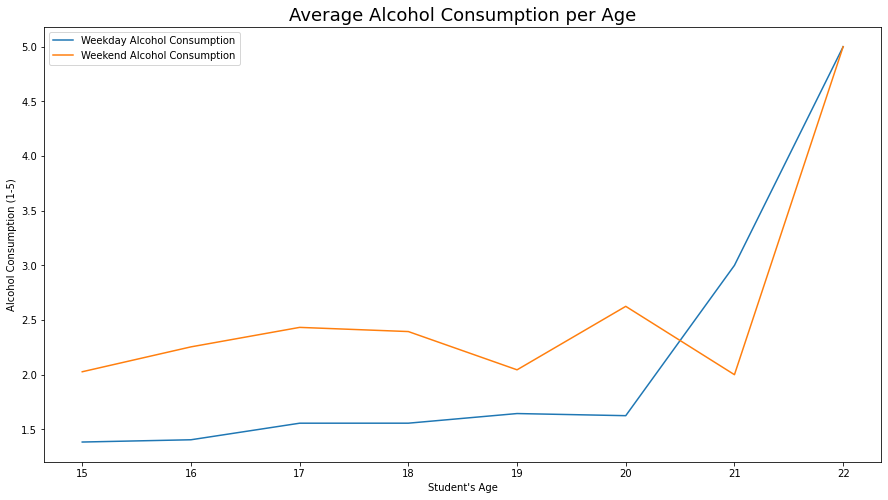

In [66]:
plt.rcParams["figure.figsize"] = (15,8)

sns.lineplot(x=grouped_Dalc["age"], y=grouped_Dalc["Dalc"])
sns.lineplot(x=grouped_Walc["age"], y=grouped_Walc["Walc"])

plt.title("Average Alcohol Consumption per Age", size=18)
plt.xlabel("Student's Age")
plt.ylabel("Alcohol Consumption (1-5)")
plt.legend(["Weekday Alcohol Consumption", "Weekend Alcohol Consumption"])

As we can see from the chart above, substantially more students from ages 15-18 drink more on weekends (with the age 17 being the most), compared to weekdays. This makes sense since the majority of kids typically have parties or meet with friends on weekends and have the time available to do so, resulting in more alcohol consumption because of that. The students also have to go to school on weekdays, which also explains why consumption is low during weekdays.

**Question 2**<br>
Do students who drink more get lower grades? Find the number of students that drink and compare their average grades to the average of the kids that don’t drink, as well as the total number of failures from kids that drink vs. kids that don’t.

In [99]:
print("Do students that drink more, perform worse academically?:")
print("(smaller numbers for grades and higher numbers failures means worse academic performance)")
print("")
#weekday drinkers absence correlation for math class (smaller number means worse performance):
col1 = datasetm["Dalc"]
col2 = datasetm["G3"]
correlation = col1.corr(col2)
print("weekday drinkers final grade correlation for math class: "+str(correlation))

#weekday drinkers absence correlation for math class:
col1 = datasetp["Dalc"]
col2 = datasetp["G3"]
correlation = col1.corr(col2)
print("weekday drinkers final grade correlation for portugese class: "+str(correlation))

#weekend drinkers absence correlation for math class:
col1 = datasetm["Walc"]
col2 = datasetm["G3"]
correlation = col1.corr(col2)
print("weekend drinkers final grade correlation for math class: "+str(correlation))

#weekend drinkers absence correlation for portugese class:
col1 = datasetp["Walc"]
col2 = datasetp["G3"]
correlation = col1.corr(col2)
print("weekend drinkers final grade correlation for portugese class: "+str(correlation))

print("--------------")

#weekday drinkers failure correlation for math class: (higher number means more likely for more past failures)
col1 = datasetm["Dalc"]
col2 = datasetm["failures"]
correlation = col1.corr(col2)
print("weekday drinkers failed classes correlation for math class: "+str(correlation))

#weekday drinkers failure correlation for portugese class:
col1 = datasetp["Dalc"]
col2 = datasetp["failures"]
correlation = col1.corr(col2)
print("weekday drinkers failed classes correlation for portugese class: "+str(correlation))

#weekend drinkers failure correlation for math class:
col1 = datasetm["Walc"]
col2 = datasetm["failures"]
correlation = col1.corr(col2)
print("weekend drinkers failed classes correlation for math class: "+str(correlation))

#weekend drinkers failure correlation for portugese class:
col1 = datasetp["Walc"]
col2 = datasetp["failures"]
correlation = col1.corr(col2)
print("weekend drinkers failed classes correlation for portugese class: "+str(correlation))
print("")
print("The data shows that the more students drink, the less their final grade is, and the more classes they fail.")

Do students that drink more, perform worse academically?:
(smaller numbers for grades and higher numbers failures means worse academic performance)

weekday drinkers final grade correlation for math class: -0.05466004056673598
weekday drinkers final grade correlation for portugese class: -0.2047193972481568
weekend drinkers final grade correlation for math class: -0.05193932374224616
weekend drinkers final grade correlation for portugese class: -0.17661887420966435
--------------
weekday drinkers failed classes correlation for math class: 0.1360469312165467
weekday drinkers failed classes correlation for portugese class: 0.10594909220788203
weekend drinkers failed classes correlation for math class: 0.14196202998571536
weekend drinkers failed classes correlation for portugese class: 0.08226626469230709

The data shows that the more students drink, the less their final grade is, and the more classes they fail.


Text(0, 0.5, 'Final Grade')

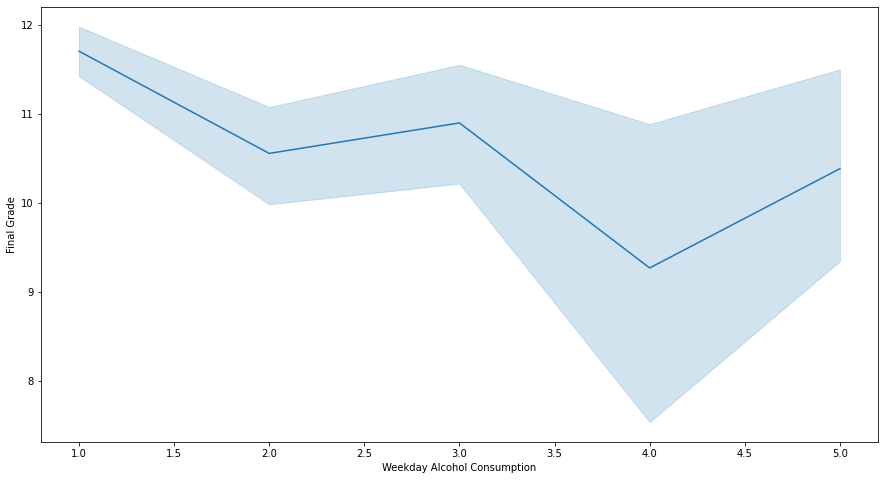

In [100]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Dalc", y="G3", data=dataset)

plt.xlabel("Weekday Alcohol Consumption")
plt.ylabel("Final Grade")


In the graphs above, we see that regardless of the time of the week, students with higher alcohol consumption finish their courses with lower grades


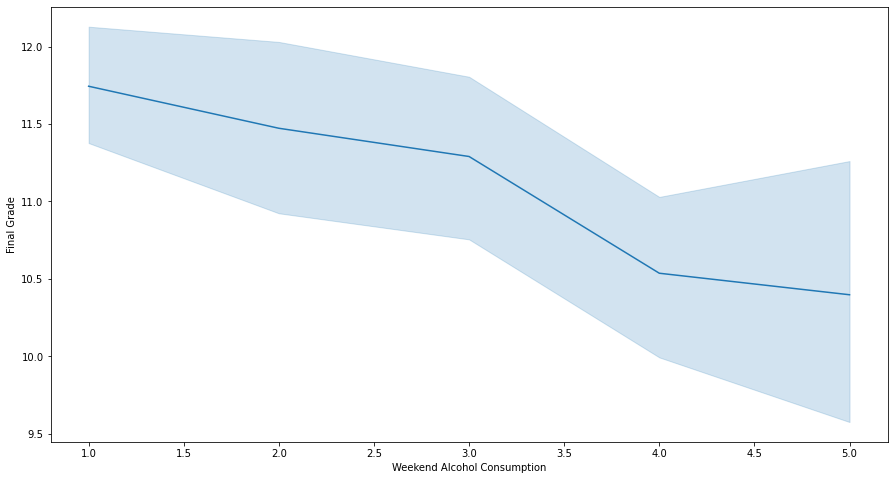

In [102]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Walc", y="G3", data=dataset)

plt.xlabel("Weekend Alcohol Consumption")
plt.ylabel("Final Grade")
print("")
print("In the graphs above, we see that regardless of the time of the week, students with higher alcohol consumption finish their courses with lower grades")

**Question 3**<br>
Do more socially active students drink more? Check if the sociable students that have more freetime have a tendency to drink more.

In [67]:
df_GODA = df_combine.groupby('goout')['Dalc'].mean().reset_index()
df_GODA

,goout,Dalc
0,1,1.166667
1,2,1.297297
2,3,1.413146
3,4,1.625850
4,5,1.971698


In [68]:
df_GOWA = df_combine.groupby('goout')['Walc'].mean().reset_index()
df_GOWA

,goout,Walc
0,1,1.583333
1,2,1.770270
2,3,2.107981
3,4,2.612245
4,5,3.235849


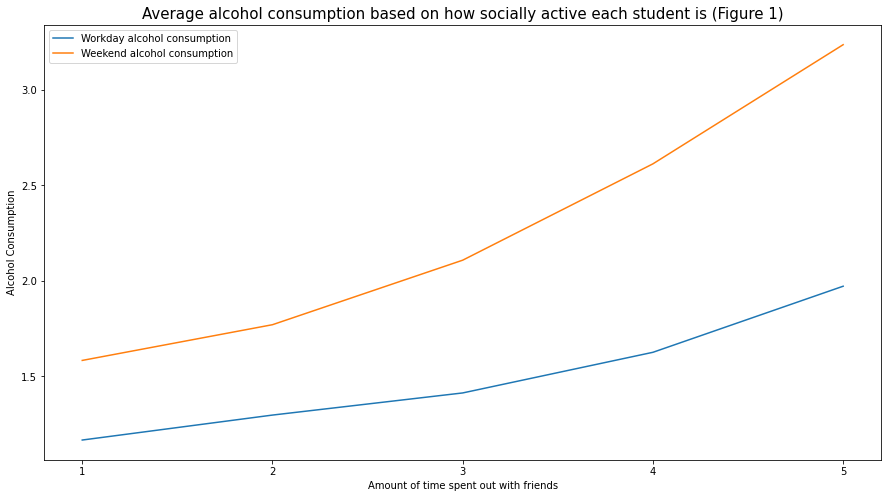

In [69]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df_GODA["goout"], y=df_GODA["Dalc"])
sns.lineplot(x=df_GOWA["goout"], y=df_GOWA["Walc"])
plt.title("Average alcohol consumption based on how socially active each student is (Figure 1)", size=15)
plt.xlabel("Amount of time spent out with friends")
plt.ylabel("Alcohol Consumption")
plt.legend(["Workday alcohol consumption", "Weekend alcohol consumption"])

In [70]:
df_SAFTD = df_combine.groupby(['goout','freetime'])['Dalc'].mean().reset_index()
df_SAFTD["gooutfreetime"]=df_SAFTD[['goout','freetime']].agg('-'.join,axis=1)
df_SAFTW = df_combine.groupby(['goout','freetime'])['Walc'].mean().reset_index()
df_SAFTW["goout-freetime"]=df_SAFTW[['goout','freetime']].agg('-'.join,axis=1)
df_SAFTW

,goout,freetime,Walc,goout-freetime
0,1,1,1.200000,1-1
1,1,2,1.764706,1-2
2,1,3,1.333333,1-3
3,1,4,1.600000,1-4
4,1,5,2.000000,1-5
5,2,1,1.611111,2-1
6,2,2,1.756757,2-2
7,2,3,1.827586,2-3
8,2,4,1.958333,2-4
9,2,5,1.363636,2-5


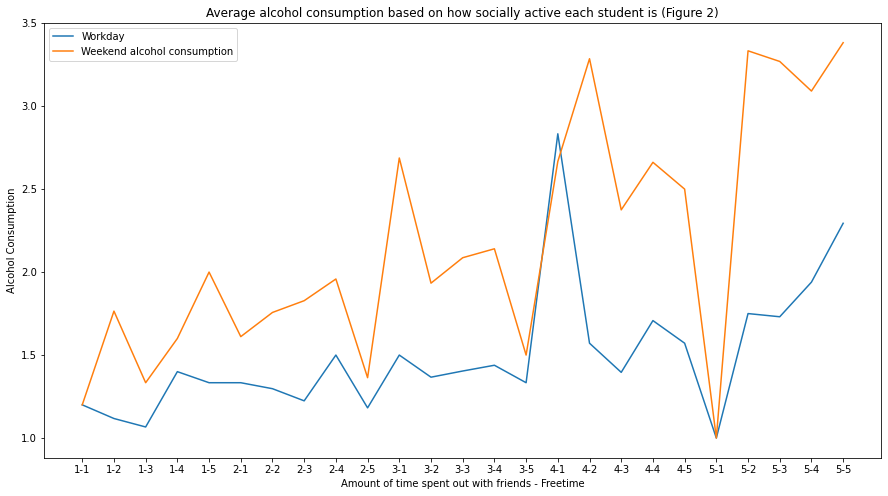

In [71]:
plt.rcParams["figure.figsize"] = (15,8)
sns.lineplot(x=df_SAFTD["gooutfreetime"], y=df_SAFTD["Dalc"])
sns.lineplot(x=df_SAFTD["gooutfreetime"], y=df_SAFTW["Walc"])
plt.title("Average alcohol consumption based on how socially active each student is (Figure 2)")
plt.xlabel("Amount of time spent out with friends - Freetime")
plt.ylabel("Alcohol Consumption")
plt.legend(["Workday", "Weekend alcohol consumption"])

After taking the average Alcohol levels per Time spent with friends - freetime, we can see theres not just one major trend among these results. Instead for each set of numbers from 1-5 we can see a steep increase in the start followed by a steep decline with some variation after that. This shows that there are many other factors that go into this besides just free time and how social a student is.

**Question 4**<br>
If they drink more, then do they miss more classes? Check for absences from students that drink compared to absences of students that don’t drink and draw conclusions.

In [95]:
print("Do students that drink more, miss more class?:")
print("(larger number means more likely to miss class)")
print("")
#weekday drinkers absence correlation for math class (larger number means more likely to miss class):
col1 = datasetm["Dalc"]
col2 = datasetm["absences"]
correlation = col1.corr(col2)
print("weekday drinkers absence correlation for math class: "+str(correlation))

#weekday drinkers absence correlation for portugese class:
col1 = datasetp["Dalc"]
col2 = datasetp["absences"]
correlation = col1.corr(col2)
print("weekday drinkers absence correlation for portugese class: "+str(correlation))

#weekend drinkers absence correlation for math class:
col1 = datasetm["Walc"]
col2 = datasetm["absences"]
correlation = col1.corr(col2)
print("weekend drinkers absence correlation for math class: "+str(correlation))

#weekend drinkers absence correlation for portugese class:
col1 = datasetp["Walc"]
col2 = datasetp["absences"]
correlation = col1.corr(col2)
print("weekend drinkers absence correlation for portugese class: "+str(correlation))
print("")
print("The data shows that students that drink more, regardless of time of the week, tend to miss more classes.")


Do students that drink more, miss more class?:
(larger number means more likely to miss class)

weekday drinkers absence correlation for math class: 0.11190802615038617
weekday drinkers absence correlation for portugese class: 0.1729524910452464
weekend drinkers absence correlation for math class: 0.136291101479951
weekend drinkers absence correlation for portugese class: 0.1563729695217541

The data shows that students that drink more, regardless of time of the week, tend to miss more classes.


Text(0, 0.5, 'Absences')

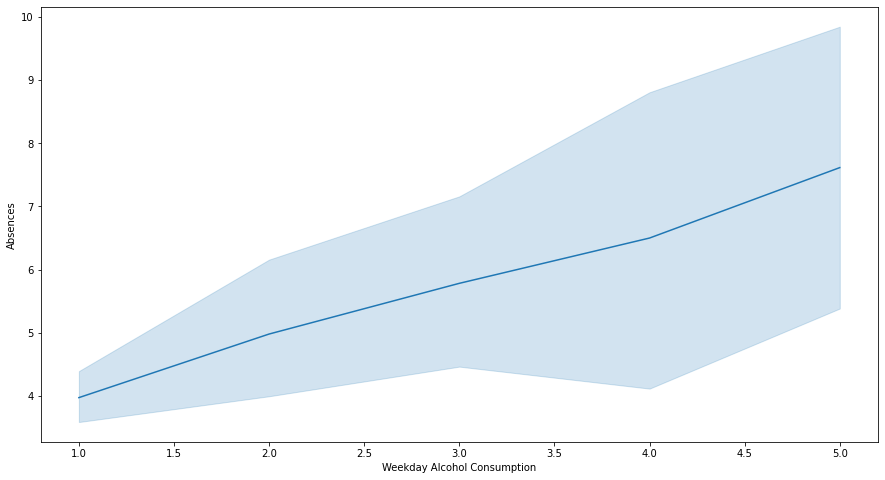

In [96]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Dalc", y="absences", data=dataset)

plt.xlabel("Weekday Alcohol Consumption")
plt.ylabel("Absences")


In the graphs above, we see that regardless of the time of the week, students with higher alcohol consumption have higher absences on average.


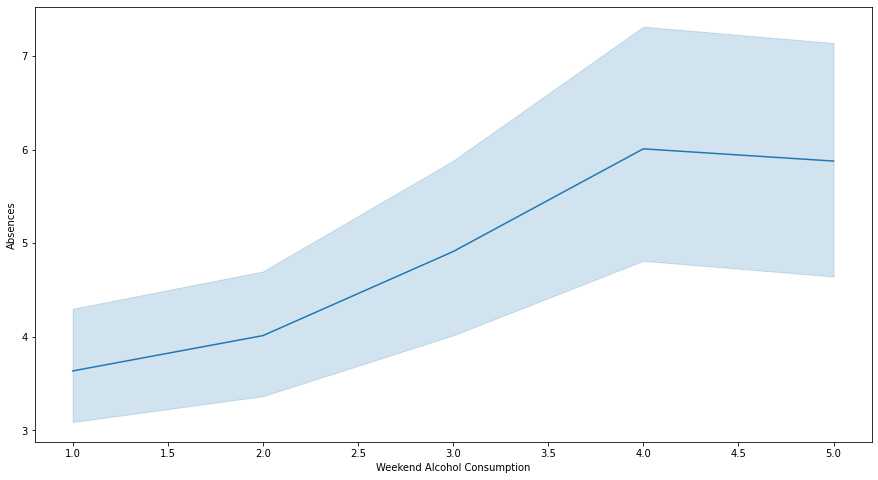

In [97]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Walc", y="absences", data=dataset)

plt.xlabel("Weekend Alcohol Consumption")
plt.ylabel("Absences")
print("")
print("In the graphs above, we see that regardless of the time of the week, students with higher alcohol consumption have higher absences on average.")

**Question 5**<br>
How does drinking affect the students’ health? Compare the health of students that don’t drink to the health of students that do drink.

In [72]:
df_SHDA = df_combine.groupby('health')['Dalc'].mean().reset_index()
df_SHDA 

,health,Dalc
0,1,1.466667
1,2,1.371795
2,3,1.440299
3,4,1.550459
4,5,1.577689


In [74]:
df_SHWA = df_combine.groupby('health')['Walc'].mean().reset_index()
df_SHWA

,health,Walc
0,1,1.988889
1,2,2.205128
2,3,2.194030
3,4,2.293578
4,5,2.466135


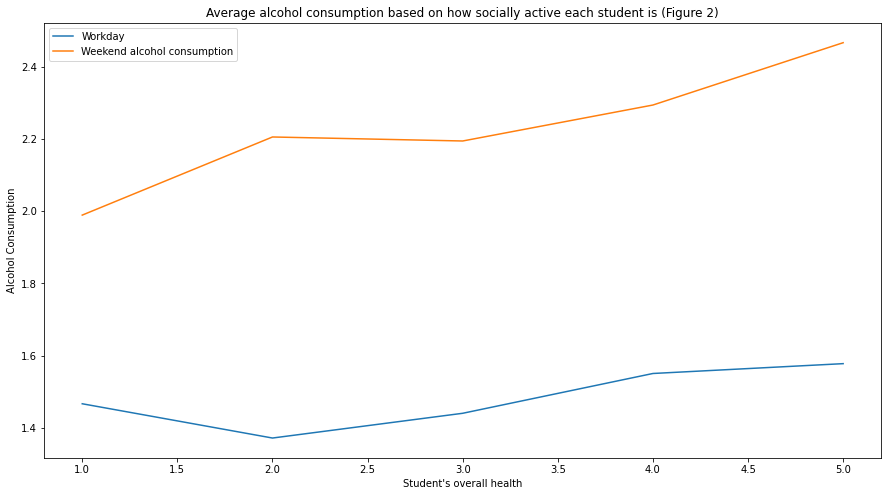

In [75]:
plt.rcParams["figure.figsize"] = (15,8)
sns.lineplot(x=df_SHDA["health"], y=df_SHDA["Dalc"])
sns.lineplot(x=df_SHWA["health"], y=df_SHWA["Walc"])
plt.title("Average alcohol consumption based on how socially active each student is (Figure 2)")
plt.xlabel("Student's overall health")
plt.ylabel("Alcohol Consumption")
plt.legend(["Workday", "Weekend alcohol consumption"])

When looking at the results shown by this graph we can see that on average students who consider themselves healthy tend to consume more alcohol. The only exception to this is for workday alcohol consumption for those who consider there health as 2 on the scale from 1-5.

**Question 6**<br>
Does family size impact whether or not the student will drink? Compare the large family sizes of kids that drink, to the small family sizes of kids that drink and see if there’s a trend / pattern

In [78]:
# get the mean of alcohol consumption during the week for both types of family sizes
dalc_famsize = df_combine.groupby('famsize')['Dalc'].mean().reset_index()
dalc_famsize

,famsize,Dalc
0,GT3,1.464208
1,LE3,1.601990


In [79]:
# get the mean of alcohol consumption during the week for both types of family sizes
walc_famsize = df_combine.groupby('famsize')['Walc'].mean().reset_index()
walc_famsize

,famsize,Walc
0,GT3,2.210412
1,LE3,2.462687


From the charts above, we can see that average alcohol consumption for students is quite low, regardless of whether it is a weekend or weekday, ranging from 1.46 to 2.46. However, it also seems that families with less than 3 people drink more than families with more than 3 people (by a margin of 0.2). So, in conclusion, yes family size can impact whether or not a student will drink. In a family of less than 3 people, the student will have a higher tendency to drink (0.2 more on the scale) compared to a student with a family size of more than 3 people.

**Question 7**<br>
do students who have one parent at home tend to drink less? To do this we will find all the students who have atleast one parent at home and assign then value each student depending on if they have one parent who stays at home.  we can then graph the students alchol consumption based on weekend and weekdays and compare trends to determine if there is a correlation. we can then calculate ratios for each of alchol consuptions amongst each group and see which what percentage of students fall under what alchol consuption group.  if the ratios are significantly different and their trends dont match its safe to say there is some correlation between the two. However if the ratio are simalar and the trends match its safe to say that there is no correlation between a students drinking habbits and weather they have one parent at home.

In [80]:
#creates new columns for that dataframe that show wether or not a student 
def is_at_home(x):
    if x == 'at_home':
        return True
    
    return False
def one_at_home(x,y):
    one = []
    for i in range(len(x)):
        if x[i] == 1 or y[i] ==1:
            one.append(1)
        else:
            one.append(0)
    return one 


M_at_home = df_combine['Mjob'].apply(is_at_home)
F_at_home = df_combine['Fjob'].apply(is_at_home)
o_at_home = one_at_home(M_at_home,F_at_home)


df_combine.insert(column='P_at_home',loc=33,value=o_at_home)
count_has_p_home = df_combine['P_at_home'].value_counts()
print(count_has_p_home)

0    493
1    169
Name: P_at_home, dtype: int64


Fjob     
P_at_home    0    1
Dalc               
1          340  119
2           92   31
3           34   11
4           14    4
5           13    4

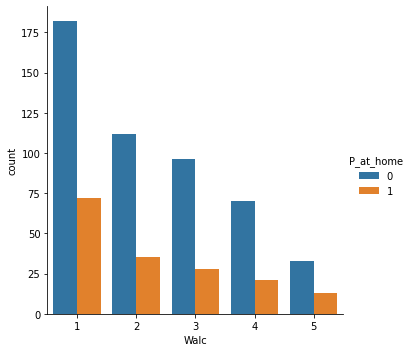

In [81]:
#creates pivot table for Dalc data and make bar graph for to get idea of data distrubution
sns.catplot(data=df_combine,kind='count', x="Walc", hue="P_at_home")
Dalc_pivot = pd.pivot_table(data=df_combine,columns=['P_at_home'] ,values=['Fjob'],index=['Dalc'],aggfunc='count')
Dalc_pivot = pd.DataFrame(data = Dalc_pivot)
Dno = Dalc_pivot['Fjob'][0].apply(func = lambda x: x/count_has_p_home[0])
Dyes = Dalc_pivot['Fjob'][1].apply(func = lambda x: x/count_has_p_home[1])
Dalc_pivot

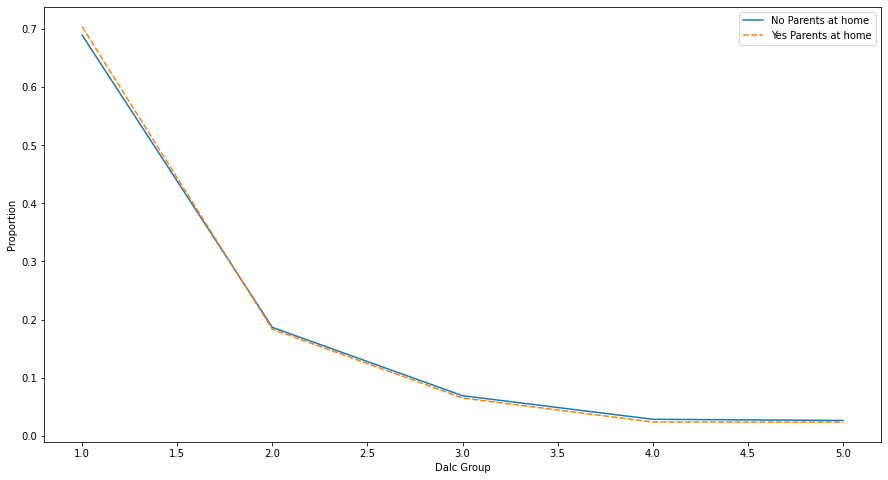

In [82]:
# prints graph of proportions
ax = sns.lineplot(data=[Dno,Dyes])
ax.set(xlabel="Dalc Group", ylabel = "Proportion") 
plt.legend(labels=["No Parents at home","Yes Parents at home"])

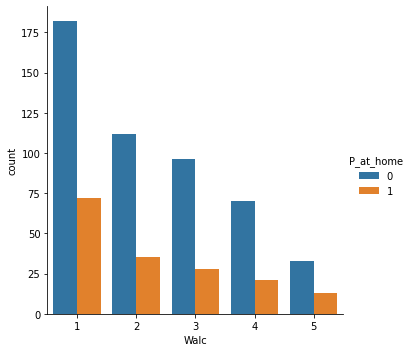

In [83]:
#creates pivot table for Walc data and make bar graph for to get idea of data distrubution
sns.catplot(data=df_combine,kind='count', x="Walc", hue="P_at_home")
Walc_pivot = pd.pivot_table(data=df_combine,columns=['P_at_home'] ,values=['Fjob'],index=['Walc'],aggfunc='count')
Walc_pivot = pd.DataFrame(data = Walc_pivot)
Wx = Walc_pivot['Fjob'][0].apply(func = lambda x: x/count_has_p_home[0])
Wy = Walc_pivot['Fjob'][1].apply(func = lambda x: x/count_has_p_home[1])

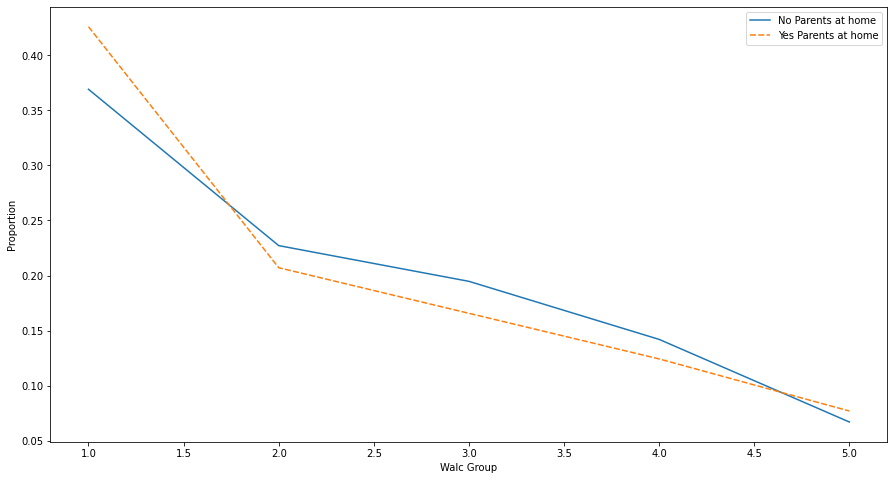

In [84]:
ax = sns.lineplot(data=[Wx,Wy])
ax.set(xlabel="Walc Group", ylabel = "Proportion") 
plt.legend(labels=["No Parents at home","Yes Parents at home"])

from the graphs above we can see that there is very little if not no correation between as the line that represtent the student who have no parents at home is almost itentical to the on that is for both graphs.

**Question 8**<br>
Do students with worse family relations tend to drink more? To answer this question we will first need to the divide the students based on which family relationships category they fall under.  then futher subdivide these groups based on there alcohol consumption categories for weekdays and weekends.  we can then then calculate what proportion of family relation group fall under which drinking category and graph the trends.  if we see a noticeable difference in propotions for of the family relation groups we can safely say that there is a trend and then all we have to do is observe it.

Fjob                
famrel    1  2   3    4   5
Walc                       
1         6  9  31  126  82
2         6  5  25   75  36
3         4  5  21   65  29
4         0  7  19   43  22
5         4  3   7   19  13

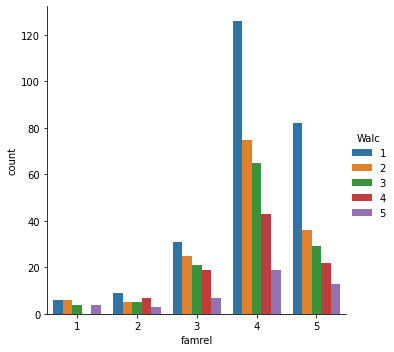

In [85]:
sns.catplot(data=df_combine,kind='count', x="famrel", hue="Walc")
Walc2_pivot = pd.pivot_table(data=df_combine,values=['Fjob'],index=['Walc'], columns=['famrel'],aggfunc='count',fill_value=0)
Walc2_pivot

Walc,1,2,3,4,5
1,0.300000,0.300000,0.200000,0.000000,0.200000
2,0.310345,0.172414,0.172414,0.241379,0.103448
3,0.300971,0.242718,0.203883,0.184466,0.067961
4,0.384146,0.228659,0.198171,0.131098,0.057927
5,0.450549,0.197802,0.159341,0.120879,0.071429


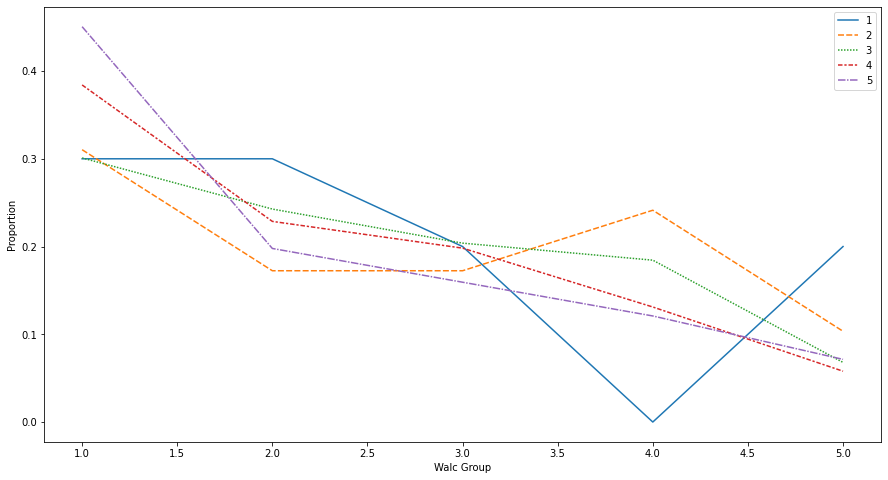

In [86]:
percent_data1 = []
for i in range(1,len(Walc2_pivot)+1):
    group_size = Walc2_pivot['Fjob'][i].sum()
    percent_data1.append(Walc2_pivot['Fjob'][i].apply(func = lambda x: x/group_size))
ax = sns.lineplot(data=percent_data1)
ax.set(xlabel="Walc Group", ylabel = "Proportion") 
d_df = pd.DataFrame(percent_data1)
d_df

Fjob                  
famrel    1   2   3    4    5
Dalc                         
1        10  15  70  227  137
2         4   9  23   68   19
3         3   4   4   20   14
4         2   0   5    6    5
5         1   1   1    7    7

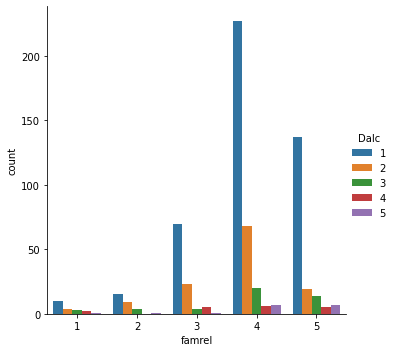

In [87]:
sns.catplot(data=df_combine,kind='count', x="famrel", hue="Dalc")
Dalc2_pivot = pd.pivot_table(data=df_combine,values=['Fjob'],index=['Dalc'], columns=['famrel'],aggfunc='count',fill_value=0)
Dalc2_pivot

Dalc,1,2,3,4,5
1,0.500000,0.200000,0.150000,0.100000,0.050000
2,0.517241,0.310345,0.137931,0.000000,0.034483
3,0.679612,0.223301,0.038835,0.048544,0.009709
4,0.692073,0.207317,0.060976,0.018293,0.021341
5,0.752747,0.104396,0.076923,0.027473,0.038462


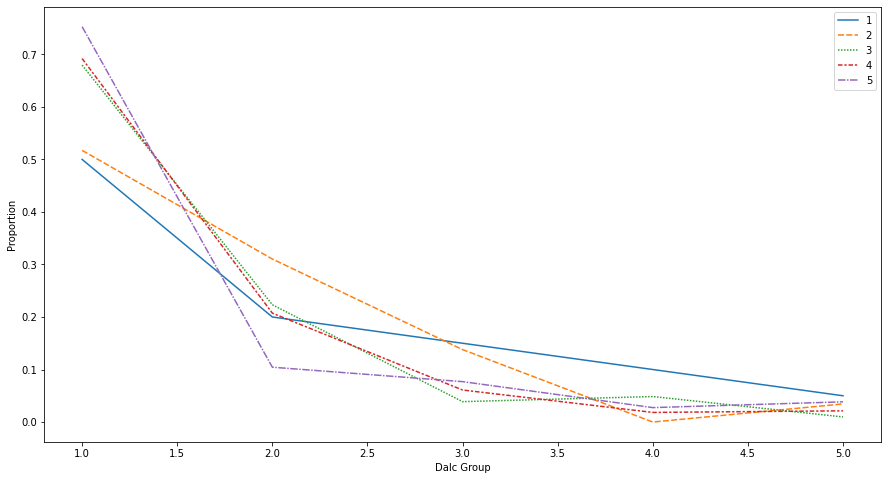

In [88]:
percent_data2 = []
for i in range(1,len(Dalc2_pivot)+1):
    group_size = Dalc2_pivot['Fjob'][i].sum()
    percent_data2.append(Dalc2_pivot['Fjob'][i].apply(func = lambda x: x/group_size))
ax1 = sns.lineplot(data=percent_data2)
ax1.set(xlabel="Dalc Group", ylabel = "Proportion") 
d_df2 = pd.DataFrame(percent_data2)
d_df2

as we can see from the graphs above larger proportion of students who fall under the lowest categories of drinking when they have better family relationships and a larger proportion proportion of stundents falling under the higher for students with poor family relations.  however the lines still trend in the same directionwith the majority of student in the lowest drinking category and every following category have a smaller proportion of the students in it. this would suggest a weak correlation between these 2 variables. 
